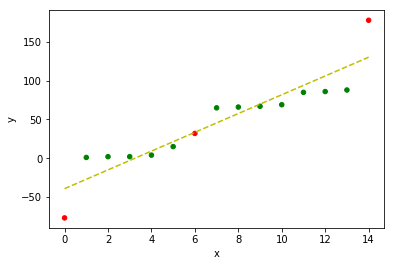

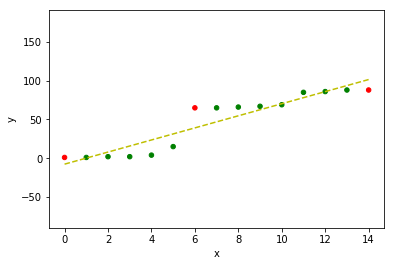

In [50]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import linregress

d = [-77,1,2,4,15,2,32,65,66,67,85,86,88,69,178]

# sort the list in-place
d.sort()

outlierindices = []

for i,y in enumerate(d):
    
    if i == 0:
        if abs( d[0] - d[1] ) >= 15:
            outlierindices.append(i)
    elif i == len(d) - 1:
        if abs( d[i] - d[len(d)-2] ) >= 15:
            outlierindices.append(i)
    else:
        if abs( d[i] - d[i-1] ) >= 15 and abs( d[i+1] - d[i] ) >= 15:
            outlierindices.append(i)

xaxis = np.arange(len(d))

color = np.full(len(d), 'g')

# set the outliers found previous to color 'r'
for i in outlierindices:
    color[i] = 'r'
    
df = pd.DataFrame({'x': xaxis, 'y': d, 'c': color})

p1 = df.plot(x='x', y='y', kind='scatter', c=df['c'])

# use linregress to get the linear regression line
(slope, intercept, _, _, _) = linregress(xaxis, df['y'])
fit = slope * xaxis + intercept

p1.plot(xaxis, fit, 'y--')

plt.show()

# for rows in the dataset that have color red, change their 'y' column to np.nan
df.loc[df['c']=='r','y'] = np.nan

# back fill and front fill nan values
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

p2 = df.plot(x='x', y='y', kind='scatter', c=df['c'])

# set the xlim and ylim to the same as p1 for visual comparison
p2.set_xlim(p1.get_xlim()) 
p2.set_ylim(p1.get_ylim())

# use linregress to get the linear regression line
(slope, intercept, _, _, _) = linregress(xaxis, df['y'])
fit = slope * xaxis + intercept

p2.plot(xaxis, fit, 'y--')

plt.show()
